In [1]:
import pandas as pd

In [2]:
wildfire_df = pd.read_csv("intermediate_files/wildfires_with_distances.csv")
wildfire_df

C:\Users\navya\AppData\Local\Temp\ipykernel_25712\2243122627.py:1: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  wildfire_df = pd.read_csv("intermediate_files/wildfires_with_distances.csv")


,Unnamed: 0,OBJECTID,USGS_Assigned_ID,Assigned_Fire_Type,Fire_Year,Fire_Polygon_Tier,Fire_Attribute_Tiers,GIS_Acres,GIS_Hectares,Listed_Fire_Types,...,Listed_Fire_Causes,Listed_Fire_Cause_Class,Listed_Rx_Reported_Acres,Wildfire_and_Rx_Flag,Overlap_Within_1_or_2_Flag,Circleness_Scale,Circle_Flag,Shape_Length,Shape_Area,Min_Distance_Miles
0,0,14600,14600,Wildfire,1964,1,"1 (1), 3 (3)",65338.877636,26441.705659,"Wildfire (3), Likely Wildfire (1)",...,14 - Unknown / Unidentified (1),Undetermined (4),NaN,NaN,NaN,0.263753,NaN,112240.801495,2.644171e+08,878.998337
1,1,14601,14601,Wildfire,1964,1,"1 (2), 3 (3), 5 (1)",55960.694158,22646.489455,"Wildfire (5), Likely Wildfire (1)",...,14 - Unknown / Unidentified (1),Undetermined (6),NaN,NaN,NaN,0.224592,NaN,112566.141954,2.264649e+08,947.767675
2,2,14602,14602,Wildfire,1964,1,"1 (2), 3 (3)",19218.105903,7777.291530,"Wildfire (4), Likely Wildfire (1)",...,14 - Unknown / Unidentified (1),Undetermined (5),NaN,NaN,NaN,0.138493,NaN,84004.974692,7.777292e+07,779.067339
3,3,14603,14603,Wildfire,1964,1,"1 (2), 3 (3)",18712.494746,7572.677954,"Wildfire (4), Likely Wildfire (1)",...,9 - Miscellaneous (1),"Undetermined (4), Human (1)",NaN,NaN,NaN,0.391960,NaN,49273.004457,7.572678e+07,954.867295
4,4,14604,14604,Wildfire,1964,1,"1 (4), 3 (6)",16887.001024,6833.926855,"Wildfire (8), Likely Wildfire (2)",...,14 - Unknown / Unidentified (2),Undetermined (10),NaN,NaN,NaN,0.392989,NaN,46746.577459,6.833927e+07,1025.522238
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117158,117158,135057,135057,Prescribed Fire,2020,8,8 (3),16.412148,6.641761,Prescribed Fire (3),...,Human (3),Human (3),NaN,NaN,"Caution, this Prescribed Fire in 2020 overlaps...",0.177425,NaN,2168.900740,6.641761e+04,973.236417
117159,117159,135058,135058,Prescribed Fire,2020,8,8 (1),7.050837,2.853373,Prescribed Fire (1),...,Human (1),Human (1),NaN,NaN,"Caution, this Prescribed Fire in 2020 overlaps...",0.374368,NaN,978.666221,2.853373e+04,745.491374
117160,117160,135059,135059,Prescribed Fire,2020,8,8 (4),9.342668,3.780843,Prescribed Fire (4),...,Human (4),Human (4),NaN,NaN,"Caution, this Prescribed Fire in 2020 overlaps...",0.123888,NaN,1958.326660,3.780843e+04,745.409646
117161,117161,135060,135060,Prescribed Fire,2020,8,8 (1),0.996962,0.403456,Prescribed Fire (1),...,Human (1),Human (1),NaN,NaN,NaN,0.993809,1.0,225.866452,4.034562e+03,220.717889


Tried to use dates to get months and find wildfire months to weightage by but looks like most are in te months May to October and even the few that lie outside are small fires which get weighted out due to my formula anyways. 

In [3]:
wildfire_df_within_650_miles = wildfire_df[wildfire_df['Min_Distance_Miles'] <= 650]
wildfire_df_within_650_miles

,Unnamed: 0,OBJECTID,USGS_Assigned_ID,Assigned_Fire_Type,Fire_Year,Fire_Polygon_Tier,Fire_Attribute_Tiers,GIS_Acres,GIS_Hectares,Listed_Fire_Types,...,Listed_Fire_Causes,Listed_Fire_Cause_Class,Listed_Rx_Reported_Acres,Wildfire_and_Rx_Flag,Overlap_Within_1_or_2_Flag,Circleness_Scale,Circle_Flag,Shape_Length,Shape_Area,Min_Distance_Miles
5,5,14605,14605,Wildfire,1964,1,"1 (2), 3 (4)",14101.443662,5706.651785,"Wildfire (4), Likely Wildfire (2)",...,Human (2),"Undetermined (4), Human (2)",NaN,NaN,NaN,0.245135,NaN,54086.991380,5.706652e+07,286.730967
7,7,14607,14607,Wildfire,1964,1,"1 (1), 3 (1)",11131.171732,4504.625381,Wildfire (2),...,NaN,Undetermined (2),NaN,NaN,NaN,0.323658,NaN,41820.660908,4.504625e+07,585.560801
8,8,14608,14608,Wildfire,1964,1,"1 (1), 3 (2)",10817.550376,4377.707322,"Wildfire (1), Likely Wildfire (2)",...,Unknown (2),Undetermined (3),NaN,NaN,NaN,0.166330,NaN,57509.990144,4.377707e+07,500.558777
13,13,14613,14613,Wildfire,1964,1,"1 (1), 3 (3)",5876.966587,2378.323998,"Wildfire (1), Likely Wildfire (3)",...,Unknown (3),Undetermined (4),NaN,NaN,NaN,0.169715,NaN,41964.322535,2.378324e+07,617.031596
14,14,14614,14614,Wildfire,1964,1,"1 (1), 3 (1)",4996.316663,2021.937618,Wildfire (2),...,NaN,Undetermined (2),NaN,NaN,NaN,0.994810,1.0,15981.540700,2.021938e+07,249.754960
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117086,117086,134985,134985,Prescribed Fire,2019,8,8 (1),22.100513,8.943760,Prescribed Fire (1),...,Human (1),Human (1),NaN,NaN,NaN,0.711816,NaN,1256.553744,8.943760e+04,597.776930
117111,117111,135010,135010,Prescribed Fire,2020,8,8 (1),4143.012270,1676.617581,Prescribed Fire (1),...,Human (1),Human (1),NaN,NaN,NaN,0.040081,NaN,72502.701703,1.676618e+07,490.537449
117118,117118,135017,135017,Prescribed Fire,2020,8,8 (1),206.093386,83.403034,Prescribed Fire (1),...,Human (1),Human (1),NaN,NaN,NaN,0.160386,NaN,8083.734161,8.340303e+05,420.347228
117145,117145,135044,135044,Prescribed Fire,2020,8,8 (1),24.718981,10.003417,Prescribed Fire (1),...,Human (1),Human (1),NaN,NaN,NaN,0.663908,NaN,1376.021245,1.000342e+05,413.546386


In [4]:
min(wildfire_df_within_650_miles['Min_Distance_Miles'])

7.848867630134931

In [5]:
max(wildfire_df_within_650_miles['Min_Distance_Miles'])

649.9772027611953

In [6]:
wildfire_df_within_650_miles.columns

Index(['Unnamed: 0', 'OBJECTID', 'USGS_Assigned_ID', 'Assigned_Fire_Type',
       'Fire_Year', 'Fire_Polygon_Tier', 'Fire_Attribute_Tiers', 'GIS_Acres',
       'GIS_Hectares', 'Listed_Fire_Types', 'Listed_Fire_Names',
       'Listed_Fire_Codes', 'Listed_Fire_IDs', 'Listed_Fire_IRWIN_IDs',
       'Listed_Fire_Dates', 'Listed_Fire_Causes', 'Listed_Fire_Cause_Class',
       'Listed_Rx_Reported_Acres', 'Wildfire_and_Rx_Flag',
       'Overlap_Within_1_or_2_Flag', 'Circleness_Scale', 'Circle_Flag',
       'Shape_Length', 'Shape_Area', 'Min_Distance_Miles'],
      dtype='object')

In [7]:
wildfire_df_within_650_miles[['Fire_Year', 'Listed_Fire_Dates']]

,Fire_Year,Listed_Fire_Dates
5,1964,Listed Wildfire Discovery Date(s): 1964-09-02 ...
7,1964,Listed Wildfire Discovery Date(s): 1964-08-16 ...
8,1964,Listed Wildfire Discovery Date(s): 1964-12-31 ...
13,1964,Listed Wildfire Discovery Date(s): 1964-08-23 ...
14,1964,Listed Other Fire Date(s): 2018-05-02 - NIFC D...
...,...,...
117086,2019,Listed Prescribed Fire Start Date(s): 2019-12-...
117111,2020,Listed Prescribed Fire Start Date(s): 2020-05-...
117118,2020,Listed Prescribed Fire Start Date(s): 2020-08-...
117145,2020,Listed Prescribed Fire Start Date(s): 2020-01-...


In [8]:
from pprint import pprint
pprint(wildfire_df['Listed_Fire_Dates'][1])

('Listed Wildfire Discovery Date(s): 1964-09-19 (2) | Listed Wildfire '
 'Containment Date(s): 1964-09-19 (1) | Listed Other Fire Date(s): 1899-12-30 '
 '- REVDATE field (1), 1964-09-19 - DATE_CUR field (1)')


In [9]:
pprint(wildfire_df['Listed_Fire_Dates'][10000])

('Listed Wildfire Discovery Date(s): 1983-07-28 (1) | Listed Wildfire '
 'Controlled Date(s): 1983-07-28 (1) | Listed Wildfire Out Date(s): 1983-07-29 '
 '(1) | Listed Other Fire Date(s): 2017-03-13 - NIFC DATE_CUR field (1) | '
 'Listed Upload Date(s): 2013-02-04 (1)')


In [10]:
pprint(wildfire_df['Listed_Fire_Dates'][100000])

('Listed Prescribed Fire End Date(s): 2013-11-19 (1) | Listed Upload Date(s): '
 '2010-07-20 (1)')


In [11]:
pprint(wildfire_df['Fire_Year'][100000])

2013


In [12]:
pprint(wildfire_df['Listed_Fire_Dates'][50010])
pprint(wildfire_df['Fire_Year'][50010])

('Listed Wildfire Discovery Date(s): 2014-07-23 (1) | Listed Other Fire '
 'Date(s): 2017-10-11 - NIFC DATE_CUR field (1), 2017-10-11 - REVDATE field '
 '(1)')
2014


In [13]:
wildfire_df_within_650_miles['Circleness_Scale']

5         0.245135
7         0.323658
8         0.166330
13        0.169715
14        0.994810
            ...   
117086    0.711816
117111    0.040081
117118    0.160386
117145    0.663908
117161    0.993809
Name: Circleness_Scale, Length: 35542, dtype: float64

In [14]:
wildfire_df_within_650_miles['Assigned_Fire_Type'].unique()

array(['Wildfire', 'Unknown - Likely Wildfire', 'Likely Wildfire',
       'Unknown - Likely Prescribed Fire', 'Prescribed Fire'],
      dtype=object)

In [15]:
import math
import numpy as np
import pandas as pd

from datetime import datetime

def calculate_smoke_impact(
    fire_data,
    reference_year=None,
    distance_threshold=650,  # miles
    season_duration=120,      # typical fire season duration in days
    population_exposure=None  # optional dict of city populations
):
    """
    Calculate estimated smoke impact from wildfire data.
    
    Parameters:
    fire_data: DataFrame containing fire information
    reference_year: Year to filter data (optional)
    distance_threshold: Maximum distance to consider fires (in miles)
    season_duration: Duration of fire season in days
    population_exposure: Dict of city populations for weighted impact
    
    Returns:
    Dictionary containing smoke impact metrics by year
    """
    
    def calculate_single_fire_impact(row):
        # Base intensity factors
        acres = row['GIS_Acres']
        distance = row['Min_Distance_Miles']
        
        # Ignore fires beyond threshold
        if distance > distance_threshold:
            return 0
        
        # Basic smoke calculation components
        
        # 1. Size Impact: Larger fires produce more smoke
        size_factor = np.log1p(acres) / np.log1p(1000)  # normalized to 1000 acres
        
        # 2. Distance Decay: Smoke dissipates with distance
        distance_factor = 1 / (1 + (distance / 50) ** 2)  # 50 mile reference distance
        
        # 3. Fire Intensity Proxy: Using circleness as a rough proxy for intensity
        intensity_factor = 1.0
        if 'Circleness_Scale' in row and not pd.isna(row['Circleness_Scale']):
            intensity_factor = 0.5 + row['Circleness_Scale'] / 2
        
        # 4. Duration Factor: Estimate duration using Shape_Length and Shape_Area
        if 'Shape_Length' in row and 'Shape_Area' in row:
            try:
                shape_length = row['Shape_Length']
                shape_area = row['Shape_Area']
                # Estimate duration (days) as a function of perimeter and area
                # This formula assumes larger fires with compact perimeters burn longer
                duration_factor = min(30, np.sqrt(shape_area) / (shape_length / 1000))  # Normalize to 30 days max
            except:
                duration_factor = 1.0  # Default if shape data can't be parsed
        else:
            duration_factor = 1.0  # Default if shape data is missing
        

        # Fire Intensity Factor
        if 'Assigned_Fire_Type' == "Wildfire":
            fire_intensity_factor = 5
        elif 'Assigned_Fire_Type' == "Likely Wildfire":
            fire_intensity_factor = 4
        elif 'Assigned_Fire_Type' == "Prescribed Fire":
            fire_intensity_factor = 5
        elif 'Assigned_Fire_Type' == "Unknown - Wildfire":
            fire_intensity_factor = 3
        else:
            fire_intensity_factor = 1

        
        # Combine factors into final smoke impact score
        smoke_impact = (
            size_factor *
            distance_factor *
            intensity_factor *
            duration_factor*
            fire_intensity_factor
        )
        
        # Scale to a more intuitive range (0-100)
        smoke_impact = min(100, smoke_impact * 20)
        
        return smoke_impact
    
    # Calculate impact for each fire
    impacts = {}
    
    for _, row in fire_data.iterrows():
        year = row['Fire_Year']
        if reference_year and year != reference_year:
            continue
            
        impact = calculate_single_fire_impact(row)
        
        if year not in impacts:
            impacts[year] = {
                'total_impact': 0,
                'peak_daily_impact': 0,
                'num_fires': 0,
                'total_acres': 0
            }
        
        impacts[year]['total_impact'] += impact
        impacts[year]['peak_daily_impact'] = max(
            impacts[year]['peak_daily_impact'],
            impact / season_duration
        )
        impacts[year]['num_fires'] += 1
        impacts[year]['total_acres'] += row['GIS_Acres']
        
    # Calculate additional metrics for each year
    for year in impacts:
        impacts[year]['average_impact_per_fire'] = (
            impacts[year]['total_impact'] / impacts[year]['num_fires']
            if impacts[year]['num_fires'] > 0 else 0
        )
        impacts[year]['impact_density'] = (
            impacts[year]['total_impact'] / impacts[year]['total_acres']
            if impacts[year]['total_acres'] > 0 else 0
        )
        
    return impacts


In [16]:
impact_results = []

# Loop through each year and calculate smoke impacts
for year in range(1964, 2025):  # Loop from 1964 to 2024
    results = calculate_smoke_impact(wildfire_df_within_650_miles, reference_year=year)
    
    if year in results:  # Check if there is data for the given year
        impact_data = results[year]
        impact_data['Year'] = year  # Add the year to the impact data
        impact_results.append(impact_data)
        print(f"Completed for year {year}...")

# Convert list of dictionaries to a DataFrame
impact_df = pd.DataFrame(impact_results)

# Display the resulting DataFrame
impact_df

Completed for year 1964...
Completed for year 1965...
Completed for year 1966...
Completed for year 1967...
Completed for year 1968...
Completed for year 1969...
Completed for year 1970...
Completed for year 1971...
Completed for year 1972...
Completed for year 1973...
Completed for year 1974...
Completed for year 1975...
Completed for year 1976...
Completed for year 1977...
Completed for year 1978...
Completed for year 1979...
Completed for year 1980...
Completed for year 1981...
Completed for year 1982...
Completed for year 1983...
Completed for year 1984...
Completed for year 1985...
Completed for year 1986...
Completed for year 1987...
Completed for year 1988...
Completed for year 1989...
Completed for year 1990...
Completed for year 1991...
Completed for year 1992...
Completed for year 1993...
Completed for year 1994...
Completed for year 1995...
Completed for year 1996...
Completed for year 1997...
Completed for year 1998...
Completed for year 1999...
Completed for year 2000...
C

,total_impact,peak_daily_impact,num_fires,total_acres,average_impact_per_fire,impact_density,Year
0,537.607046,0.294440,138,1.133548e+05,3.895703,0.004743,1964
1,235.333729,0.117670,100,4.558144e+04,2.353337,0.005163,1965
2,495.438609,0.279405,170,3.532805e+05,2.914345,0.001402,1966
3,312.113945,0.212278,98,3.159422e+04,3.184836,0.009879,1967
4,206.553770,0.155622,85,4.076966e+04,2.430044,0.005066,1968
5,312.751163,0.277007,98,7.392877e+04,3.191338,0.004230,1969
6,509.448998,0.125394,176,9.387347e+04,2.894597,0.005427,1970
7,1002.144596,0.708210,214,4.669982e+05,4.682919,0.002146,1971
8,690.820427,0.204657,146,2.349236e+05,4.731647,0.002941,1972
9,544.272945,0.156362,156,2.181778e+05,3.488929,0.002495,1973


In [17]:
aqi_df = pd.read_csv("aqi_yearly.csv")
aqi_df.columns= ["Index", "Year", "average_aqi"]
aqi_df

,Index,Year,average_aqi
0,0,1978,55.601504
1,1,1979,67.342391
2,2,1980,49.010929
3,3,1981,64.347826
4,4,1982,70.184783
5,5,1983,66.304348
6,6,1984,62.538043
7,7,1985,55.614130
8,8,1986,62.603261
9,9,1987,71.684783


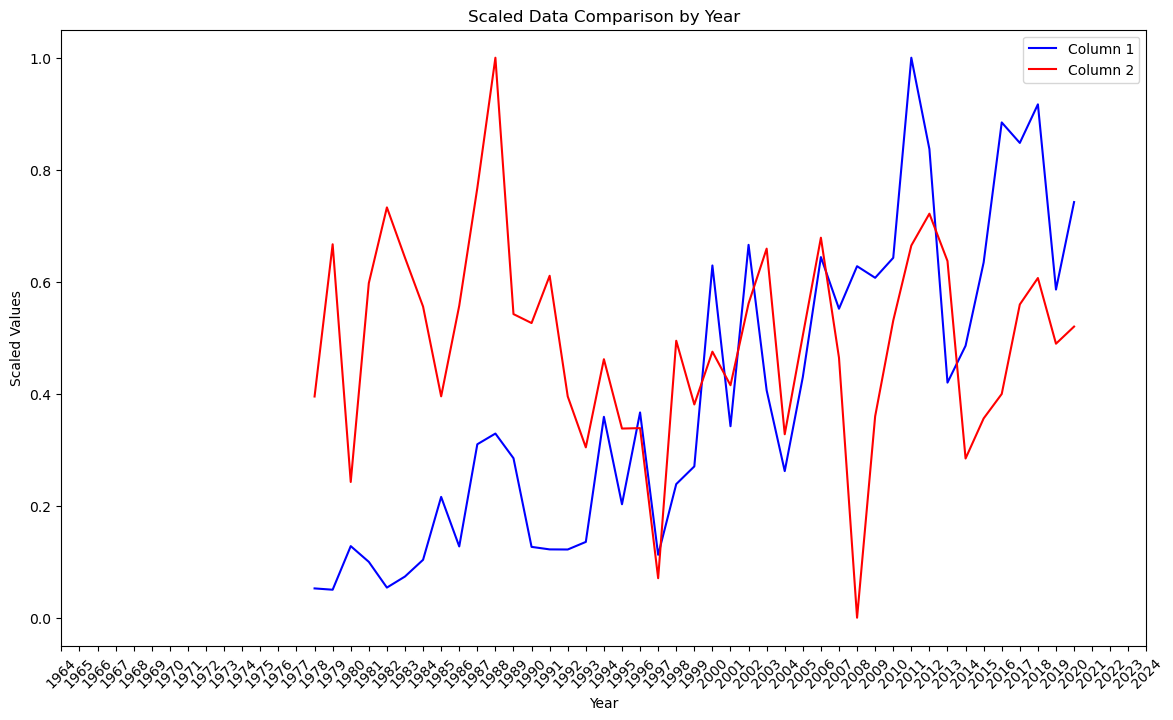

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Scale the columns to [0, 1] range
scaler = MinMaxScaler()
impact_df['total_impact_scaled'] = scaler.fit_transform(impact_df[['total_impact']])
aqi_df['average_aqi_scaled'] = scaler.fit_transform(aqi_df[['average_aqi']])

# Merge DataFrames on "Year"
merged_df = pd.merge(impact_df[['Year', 'total_impact_scaled']], aqi_df[['Year', 'average_aqi_scaled']], on='Year')

# Plot
plt.figure(figsize=(14, 8))
plt.plot(merged_df['Year'], merged_df['total_impact_scaled'], color='blue', label='Column 1')
plt.plot(merged_df['Year'], merged_df['average_aqi_scaled'], color='red', label='Column 2')

# Set x-axis ticks to include every year from 1964 to 2024
plt.xticks(range(1964, 2025, 1), rotation=45)  # Adjust step to 5 years for readability; use 1 to include all years

# Labels and legend
plt.xlabel('Year')
plt.ylabel('Scaled Values')
plt.title('Scaled Data Comparison by Year')
plt.legend()

# Show the plot
plt.show()

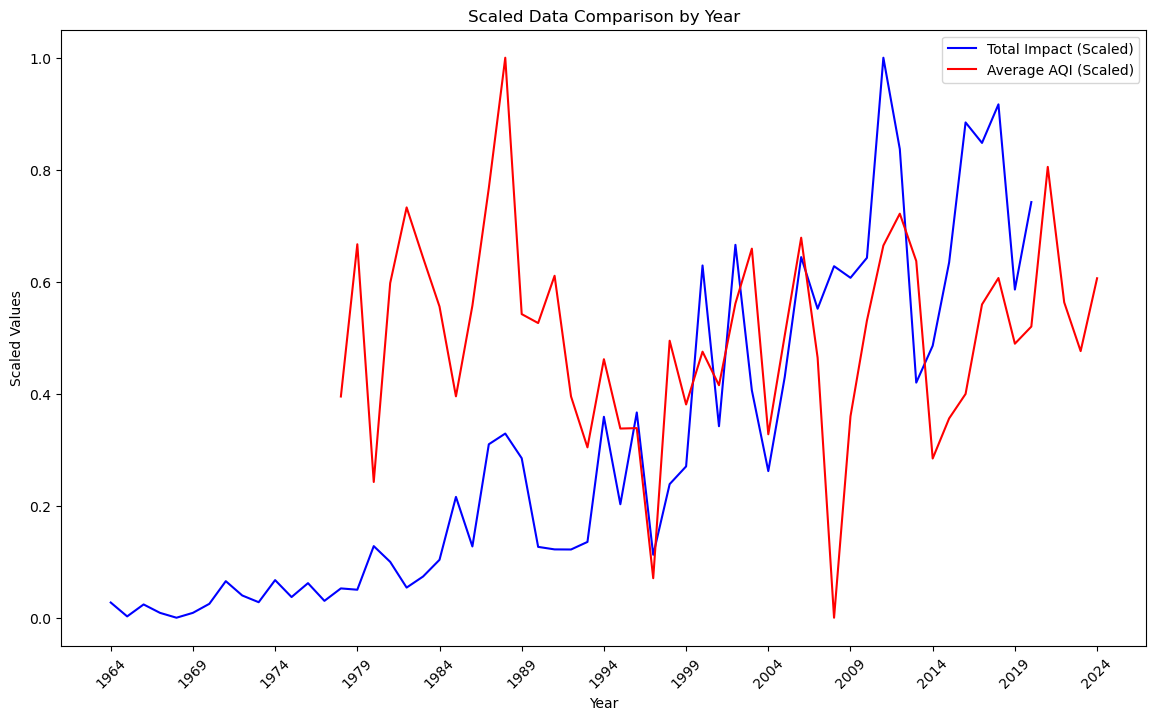

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Scale the columns to [0, 1] range
scaler = MinMaxScaler()
impact_df['total_impact_scaled'] = scaler.fit_transform(impact_df[['total_impact']])
aqi_df['average_aqi_scaled'] = scaler.fit_transform(aqi_df[['average_aqi']])

# Merge DataFrames on "Year", keeping all years from both DataFrames
merged_df = pd.merge(impact_df[['Year', 'total_impact_scaled']], 
                      aqi_df[['Year', 'average_aqi_scaled']], 
                      on='Year', 
                      how='outer')

# Create a complete list of years from 1964 to 2024
full_years = pd.DataFrame({'Year': range(1964, 2025)})

# Merge with the complete years DataFrame to ensure all years are included
merged_df = pd.merge(full_years, merged_df, on='Year', how='left')

# Plot
plt.figure(figsize=(14, 8))
plt.plot(merged_df['Year'], merged_df['total_impact_scaled'], color='blue', label='Total Impact (Scaled)')
plt.plot(merged_df['Year'], merged_df['average_aqi_scaled'], color='red', label='Average AQI (Scaled)')

# Set x-axis ticks to include every year from 1964 to 2024
plt.xticks(range(1964, 2025, 5), rotation=45)  # Change the interval to 1 if you want every year

# Labels and legend
plt.xlabel('Year')
plt.ylabel('Scaled Values')
plt.title('Scaled Data Comparison by Year')
plt.legend()

# Show the plot
plt.show()


In [20]:
# Calculate the Pearson correlation between the scaled values
correlation = merged_df[['total_impact_scaled', 'average_aqi_scaled']].corr().iloc[0, 1]
print(f'Pearson correlation between Total Impact and Average AQI (scaled): {correlation}')

Pearson correlation between Total Impact and Average AQI (scaled): 0.07694381724528723


In [64]:
# import pandas as pd
# import matplotlib.pyplot as plt
# from sklearn.preprocessing import MinMaxScaler
# from scipy.stats import pearsonr

# # Merge DataFrames on "Year", keeping all years from both DataFrames
# merged_df_stat = pd.merge(impact_df[['Year', 'total_impact_scaled']], 
#                       aqi_df[['Year', 'average_aqi_scaled']], 
#                       on='Year', 
#                       how='inner')

# # Calculate Pearson correlation and p-value
# correlation, p_value = pearsonr(merged_df_stat['total_impact_scaled'], merged_df_stat['average_aqi_scaled'])

# # Display the correlation and p-value
# print(f"Pearson correlation coefficient: {correlation}")
# print(f"P-value: {p_value}")

# # Interpret the p-value
# if p_value < 0.05:
#     print("The correlation is statistically significant (reject the null hypothesis).")
# else:
#     print("The correlation is not statistically significant (fail to reject the null hypothesis).")

In [22]:
impact_df[['Year', 'total_impact_scaled']]

,Year,total_impact_scaled
0,1964,0.027160
1,1965,0.002361
2,1966,0.023701
3,1967,0.008660
4,1968,0.000000
5,1969,0.008713
6,1970,0.024850
7,1971,0.065272
8,1972,0.039730
9,1973,0.027707


In [70]:
impact_df.columns

Index(['total_impact', 'peak_daily_impact', 'num_fires', 'total_acres',
       'average_impact_per_fire', 'impact_density', 'Year',
       'total_impact_scaled'],
      dtype='object')

In [68]:
# wildfire_df_within_650_miles

In [69]:
wildfire_df_within_650_miles.columns

Index(['Unnamed: 0', 'OBJECTID', 'USGS_Assigned_ID', 'Assigned_Fire_Type',
       'Fire_Year', 'Fire_Polygon_Tier', 'Fire_Attribute_Tiers', 'GIS_Acres',
       'GIS_Hectares', 'Listed_Fire_Types', 'Listed_Fire_Names',
       'Listed_Fire_Codes', 'Listed_Fire_IDs', 'Listed_Fire_IRWIN_IDs',
       'Listed_Fire_Dates', 'Listed_Fire_Causes', 'Listed_Fire_Cause_Class',
       'Listed_Rx_Reported_Acres', 'Wildfire_and_Rx_Flag',
       'Overlap_Within_1_or_2_Flag', 'Circleness_Scale', 'Circle_Flag',
       'Shape_Length', 'Shape_Area', 'Min_Distance_Miles'],
      dtype='object')

In [56]:
wildfire_df_within_650_miles_grouped = wildfire_df_within_650_miles.groupby('Fire_Year').agg({
    'GIS_Acres': 'mean',
    'Shape_Length': 'mean',
    'Shape_Area': 'mean',
    'Circleness_Scale': 'mean',
}).reset_index()
wildfire_df_within_650_miles_grouped

,Fire_Year,GIS_Acres,Shape_Length,Shape_Area,Circleness_Scale
0,1964,821.411743,6281.134037,3.324135e+06,0.692731
1,1965,455.814435,4570.249877,1.844616e+06,0.623732
2,1966,2078.120464,9356.220102,8.409855e+06,0.671092
3,1967,322.390035,2970.186385,1.304666e+06,0.772353
4,1968,479.643100,4160.062377,1.941047e+06,0.640985
5,1969,754.375201,5984.516839,3.052848e+06,0.664294
6,1970,533.371978,4672.020184,2.158480e+06,0.663773
7,1971,2182.234748,8985.495396,8.831191e+06,0.629299
8,1972,1609.065858,8203.453934,6.511658e+06,0.600614
9,1973,1398.575677,8387.725544,5.659835e+06,0.635696


In [57]:
wildfire_df_within_650_miles_grouped.columns

Index(['Fire_Year', 'GIS_Acres', 'Shape_Length', 'Shape_Area',
       'Circleness_Scale'],
      dtype='object')

In [72]:
merged_impact = pd.merge(impact_df, wildfire_df_within_650_miles_grouped, left_on='Year', right_on='Fire_Year', how='inner')
merged_impact

,total_impact,peak_daily_impact,num_fires,total_acres,average_impact_per_fire,impact_density,Year,total_impact_scaled,Fire_Year,GIS_Acres,Shape_Length,Shape_Area,Circleness_Scale
0,537.607046,0.294440,138,1.133548e+05,3.895703,0.004743,1964,0.027160,1964,821.411743,6281.134037,3.324135e+06,0.692731
1,235.333729,0.117670,100,4.558144e+04,2.353337,0.005163,1965,0.002361,1965,455.814435,4570.249877,1.844616e+06,0.623732
2,495.438609,0.279405,170,3.532805e+05,2.914345,0.001402,1966,0.023701,1966,2078.120464,9356.220102,8.409855e+06,0.671092
3,312.113945,0.212278,98,3.159422e+04,3.184836,0.009879,1967,0.008660,1967,322.390035,2970.186385,1.304666e+06,0.772353
4,206.553770,0.155622,85,4.076966e+04,2.430044,0.005066,1968,0.000000,1968,479.643100,4160.062377,1.941047e+06,0.640985
5,312.751163,0.277007,98,7.392877e+04,3.191338,0.004230,1969,0.008713,1969,754.375201,5984.516839,3.052848e+06,0.664294
6,509.448998,0.125394,176,9.387347e+04,2.894597,0.005427,1970,0.024850,1970,533.371978,4672.020184,2.158480e+06,0.663773
7,1002.144596,0.708210,214,4.669982e+05,4.682919,0.002146,1971,0.065272,1971,2182.234748,8985.495396,8.831191e+06,0.629299
8,690.820427,0.204657,146,2.349236e+05,4.731647,0.002941,1972,0.039730,1972,1609.065858,8203.453934,6.511658e+06,0.600614
9,544.272945,0.156362,156,2.181778e+05,3.488929,0.002495,1973,0.027707,1973,1398.575677,8387.725544,5.659835e+06,0.635696


In [71]:
aqi_df.columns

Index(['Index', 'Year', 'average_aqi', 'average_aqi_scaled'], dtype='object')

In [75]:
merged_df_aqi = pd.merge(aqi_df, merged_impact, left_on='Year', right_on='Fire_Year', how='right')
merged_df_aqi
# # Fill missing values in 'Impact' with the average of the closest two values
merged_df_aqi['average_aqi_scaled'] = merged_df_aqi['average_aqi_scaled'].bfill()  # Forward fill to handle leading NaNs
# merged_df['average_aqi'] = merged_df['average_aqi'].interpolate(method='linear')  # Interpolate remaining NaNs
merged_df_aqi
#merged_df[(merged_df['Year'] >= 1964) & (merged_df['Year'] <= 2020)][['Year','average_aqi', 'GIS_Acres', 'Shape_Length', 'Shape_Area', 'Circleness_Scale']]


,Index,Year_x,average_aqi,average_aqi_scaled,total_impact,peak_daily_impact,num_fires,total_acres,average_impact_per_fire,impact_density,Year_y,total_impact_scaled,Fire_Year,GIS_Acres,Shape_Length,Shape_Area,Circleness_Scale
0,NaN,NaN,NaN,0.395016,537.607046,0.294440,138,1.133548e+05,3.895703,0.004743,1964,0.027160,1964,821.411743,6281.134037,3.324135e+06,0.692731
1,NaN,NaN,NaN,0.395016,235.333729,0.117670,100,4.558144e+04,2.353337,0.005163,1965,0.002361,1965,455.814435,4570.249877,1.844616e+06,0.623732
2,NaN,NaN,NaN,0.395016,495.438609,0.279405,170,3.532805e+05,2.914345,0.001402,1966,0.023701,1966,2078.120464,9356.220102,8.409855e+06,0.671092
3,NaN,NaN,NaN,0.395016,312.113945,0.212278,98,3.159422e+04,3.184836,0.009879,1967,0.008660,1967,322.390035,2970.186385,1.304666e+06,0.772353
4,NaN,NaN,NaN,0.395016,206.553770,0.155622,85,4.076966e+04,2.430044,0.005066,1968,0.000000,1968,479.643100,4160.062377,1.941047e+06,0.640985
5,NaN,NaN,NaN,0.395016,312.751163,0.277007,98,7.392877e+04,3.191338,0.004230,1969,0.008713,1969,754.375201,5984.516839,3.052848e+06,0.664294
6,NaN,NaN,NaN,0.395016,509.448998,0.125394,176,9.387347e+04,2.894597,0.005427,1970,0.024850,1970,533.371978,4672.020184,2.158480e+06,0.663773
7,NaN,NaN,NaN,0.395016,1002.144596,0.708210,214,4.669982e+05,4.682919,0.002146,1971,0.065272,1971,2182.234748,8985.495396,8.831191e+06,0.629299
8,NaN,NaN,NaN,0.395016,690.820427,0.204657,146,2.349236e+05,4.731647,0.002941,1972,0.039730,1972,1609.065858,8203.453934,6.511658e+06,0.600614
9,NaN,NaN,NaN,0.395016,544.272945,0.156362,156,2.181778e+05,3.488929,0.002495,1973,0.027707,1973,1398.575677,8387.725544,5.659835e+06,0.635696


In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [77]:
df = impact_df[['Year', 'total_impact_scaled']]
# Split data into train and test sets
train_df = df[df['Year'] < 2015]
test_df = df[df['Year'] >= 2015]

# ARIMA Model
arima_model = ARIMA(train_df['total_impact_scaled'], order=(2, 1, 2))
arima_result = arima_model.fit()
arima_pred = arima_result.predict(start=len(train_df), end=len(train_df)+len(test_df)-1, typ='levels')
arima_mse = mean_squared_error(test_df['total_impact_scaled'], arima_pred)

C:\Users\navya\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


C:\Users\navya\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


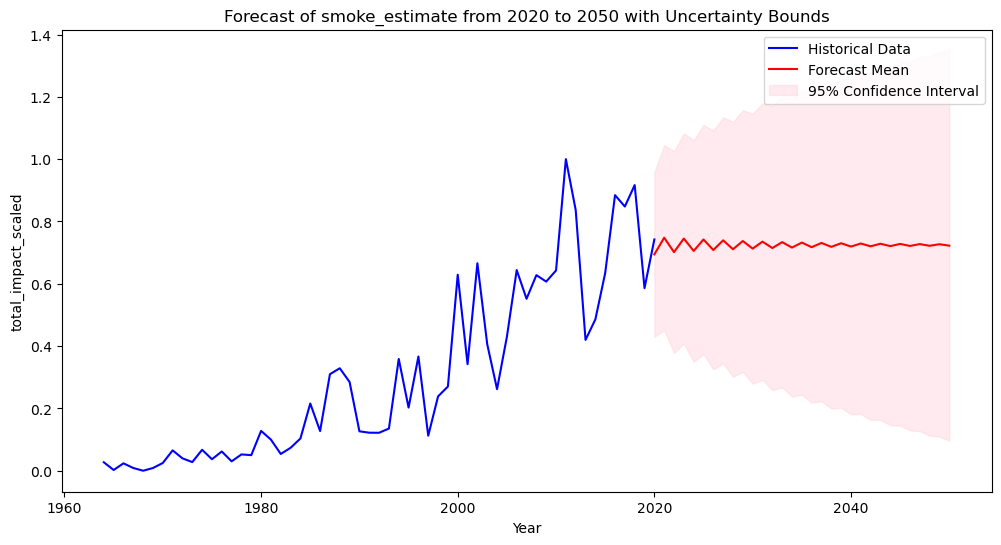

In [78]:
# Forecasting for 2020-2050 with ARIMA and calculating uncertainty bounds
forecast_years = range(2020, 2051)
n_forecasts = len(forecast_years)
forecast_result = ARIMA(df['total_impact_scaled'], order=(2, 1, 2)).fit()
forecast = forecast_result.get_forecast(steps=n_forecasts)
forecast_mean = forecast.predicted_mean
forecast_conf_int = forecast.conf_int(alpha=0.05)  # 95% confidence interval

# Plotting historical data and forecast with uncertainty bounds
plt.figure(figsize=(12, 6))
plt.plot(df['Year'], df['total_impact_scaled'], label='Historical Data', color='blue')
plt.plot(forecast_years, forecast_mean, label='Forecast Mean', color='red')
plt.fill_between(forecast_years, forecast_conf_int.iloc[:, 0], forecast_conf_int.iloc[:, 1], color='pink', alpha=0.3, label='95% Confidence Interval')
plt.title("Forecast of smoke_estimate from 2020 to 2050 with Uncertainty Bounds")
plt.xlabel("Year")
plt.ylabel("total_impact_scaled")
plt.legend()
plt.show()

In [79]:
# Display forecast values with uncertainty bounds
forecast_results = pd.DataFrame({
    'Year': forecast_years,
    'Forecast_Mean': forecast_mean,
    'Lower_Bound': forecast_conf_int.iloc[:, 0],
    'Upper_Bound': forecast_conf_int.iloc[:, 1]
})
print(forecast_results)

# Model evaluation and conclusion
print("Model Evaluation:")
print(f"ARIMA MSE: {arima_mse}")

# Interpretation
print("\nThe forecast for smoke_estimate shows a trend with a 95% confidence interval from 2020 to 2050. The model captures trend variations, but uncertainty increases further into the forecast period, which is typical for long-term projections.")

    Year  Forecast_Mean  Lower_Bound  Upper_Bound
57  2020       0.694298     0.430025     0.958571
58  2021       0.747878     0.451110     1.044645
59  2022       0.701595     0.377915     1.025275
60  2023       0.745192     0.408075     1.082309
61  2024       0.705371     0.349689     1.061052
62  2025       0.742137     0.374866     1.109408
63  2026       0.708320     0.324840     1.091800
64  2027       0.739466     0.344968     1.133964
65  2028       0.710793     0.301577     1.120010
66  2029       0.737193     0.317359     1.157027
67  2030       0.712887     0.279493     1.146282
68  2031       0.735265     0.291601     1.178930
69  2032       0.714662     0.258380     1.170944
70  2033       0.733632     0.267395     1.199868
71  2034       0.716166     0.238097     1.194236
72  2035       0.732246     0.244512     1.219981
73  2036       0.717442     0.218536     1.216348
74  2037       0.731072     0.222771     1.239373
75  2038       0.718523     0.199616     1.237430


In [80]:
# Select the best model based on MSE
best_model = min([(arima_mse, 'ARIMA')], key=lambda x: x[0])
print(f"Best Model: {best_model[1]} with MSE: {best_model[0]}")

# Forecasting for 2020-2050 using the best model with uncertainty via bootstrapping
forecast_years = range(2020, 2051)
n_forecasts = len(forecast_years)
n_bootstrap = 1000  # Number of bootstrap samples for uncertainty



Best Model: ARIMA with MSE: 0.017133649354814727


In [53]:
impact_df.columns

Index(['total_impact', 'peak_daily_impact', 'num_fires', 'total_acres',
       'average_impact_per_fire', 'impact_density', 'Year',
       'total_impact_scaled'],
      dtype='object')

In [54]:
wildfire_df_within_650_miles_grouped.columns

Index(['Fire_Year', 'GIS_Acres', 'Shape_Length', 'Shape_Area',
       'Circleness_Scale'],
      dtype='object')

In [ ]:
joined_df = pd.merge(impact_df, wildfire_df_within_650_miles_grouped, left_on='Year', right_on='Fire_Year', how='inner')

In [81]:
merged_df_aqi.columns

Index(['Index', 'Year_x', 'average_aqi', 'average_aqi_scaled', 'total_impact',
       'peak_daily_impact', 'num_fires', 'total_acres',
       'average_impact_per_fire', 'impact_density', 'Year_y',
       'total_impact_scaled', 'Fire_Year', 'GIS_Acres', 'Shape_Length',
       'Shape_Area', 'Circleness_Scale'],
      dtype='object')

C:\Users\navya\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\navya\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\navya\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\navya\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\navya\anaconda3\Lib\site-packa

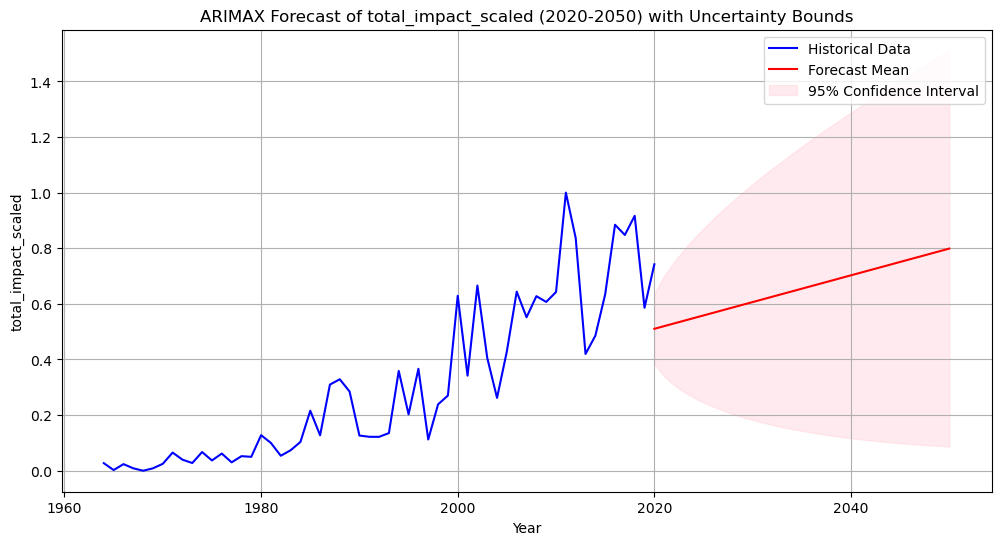

Test Set MSE: 0.024679408169253486

Model Summary:
                                SARIMAX Results                                
Dep. Variable:     total_impact_scaled   No. Observations:                   51
Model:                SARIMAX(2, 1, 2)   Log Likelihood                  61.967
Date:                 Tue, 29 Oct 2024   AIC                            -97.933
Time:                         19:04:37   BIC                            -73.077
Sample:                              0   HQIC                           -88.468
                                  - 51                                         
Covariance Type:                   opg                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
average_aqi_scaled    -0.0616      0.014     -4.416      0.000      -0.089      -0.034
GIS_Acres           2.734e-11        nan        

In [86]:
import pandas as pd
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Prepare endogenous and exogenous variables
endog = merged_df_aqi['total_impact_scaled']
exog = merged_df_aqi[['average_aqi_scaled', 'GIS_Acres', 'Shape_Length', 'Shape_Area', 'Circleness_Scale','peak_daily_impact', 'num_fires', 'total_acres']]

# Split data into train and test sets
train_mask = merged_df_aqi['Fire_Year'] < 2015
test_mask = merged_df_aqi['Fire_Year'] >= 2015

train_endog = endog[train_mask]
train_exog = exog[train_mask]
test_endog = endog[test_mask]
test_exog = exog[test_mask]

# ARIMAX Model
arimax_model = SARIMAX(
    train_endog,
    exog=train_exog,
    order=(2, 1, 2)
)
arimax_result = arimax_model.fit()

# Make predictions on test set
arimax_pred = arimax_result.predict(
    start=len(train_endog),
    end=len(train_endog) + len(test_endog) - 1,
    exog=test_exog
)

# Calculate MSE
arimax_mse = mean_squared_error(test_endog, arimax_pred)

# Create future exogenous variables (you'll need to forecast or assume values)
# Here we'll use a simple linear extrapolation for demonstration
future_years = pd.DataFrame(index=range(2020, 2051))
for col in exog.columns:
    # Fit linear trend to existing data
    z = np.polyfit(impact_df['Year'], exog[col], 1)
    p = np.poly1d(z)
    # Extrapolate
    future_years[col] = p(future_years.index)

# Forecast for 2020-2050 with ARIMAX
forecast_model = SARIMAX(
    endog,
    exog=exog,
    order=(2, 1, 2)
).fit()

# Get forecast and confidence intervals
forecast = forecast_model.get_forecast(
    steps=len(future_years),
    exog=future_years
)
forecast_mean = forecast.predicted_mean
forecast_conf_int = forecast.conf_int(alpha=0.05)

# Plotting
plt.figure(figsize=(12, 6))

# Plot historical data
plt.plot(merged_df_aqi['Fire_Year'], endog, label='Historical Data', color='blue')

# Plot forecast
plt.plot(future_years.index, forecast_mean, label='Forecast Mean', color='red')

# Plot confidence intervals
plt.fill_between(
    future_years.index,
    forecast_conf_int.iloc[:, 0],
    forecast_conf_int.iloc[:, 1],
    color='pink',
    alpha=0.3,
    label='95% Confidence Interval'
)

plt.title("ARIMAX Forecast of total_impact_scaled (2020-2050) with Uncertainty Bounds")
plt.xlabel("Year")
plt.ylabel("total_impact_scaled")
plt.legend()
plt.grid(True)
plt.show()

# Print model summary and MSE
print(f"Test Set MSE: {arimax_mse}")
print("\nModel Summary:")
print(arimax_result.summary())

C:\Users\navya\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\navya\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\navya\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\navya\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\navya\anaconda3\Lib\site-packages\statsmodels\base\model


MSE for different orders: {(1, 1, 1): 0.024474087146720055, (2, 1, 2): 0.024679408169253486, (1, 1, 2): 0.024509478376677028}

Best performing order: (1, 1, 1)


C:\Users\navya\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


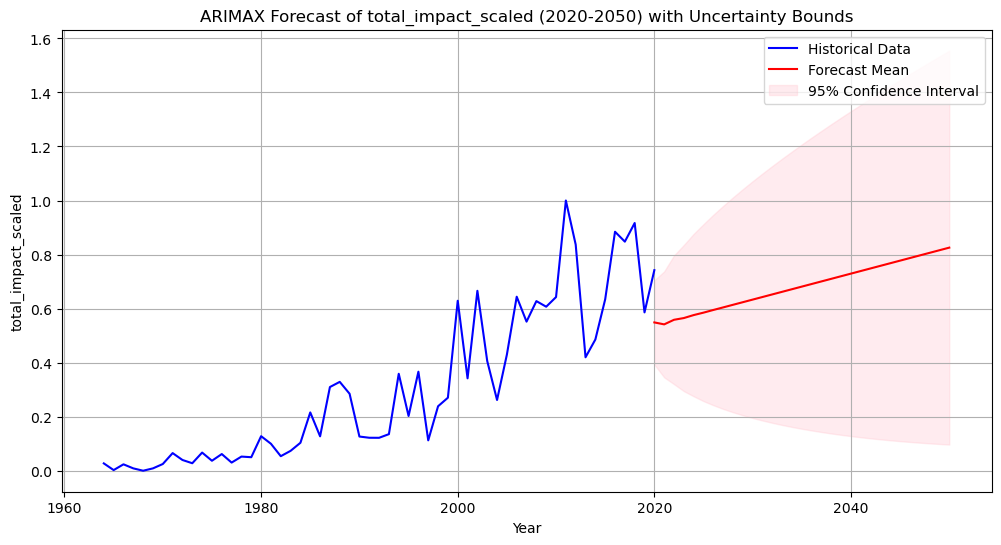


Test Set MSE: 0.024474087146720055

Model Summary:
                                SARIMAX Results                                
Dep. Variable:     total_impact_scaled   No. Observations:                   51
Model:                SARIMAX(1, 1, 1)   Log Likelihood                  65.891
Date:                 Tue, 29 Oct 2024   AIC                           -109.781
Time:                         19:06:03   BIC                            -88.749
Sample:                              0   HQIC                          -101.772
                                  - 51                                         
Covariance Type:                   opg                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
average_aqi_scaled    -0.0616      0.026     -2.413      0.016      -0.112      -0.012
GIS_Acres           2.734e-11        nan       

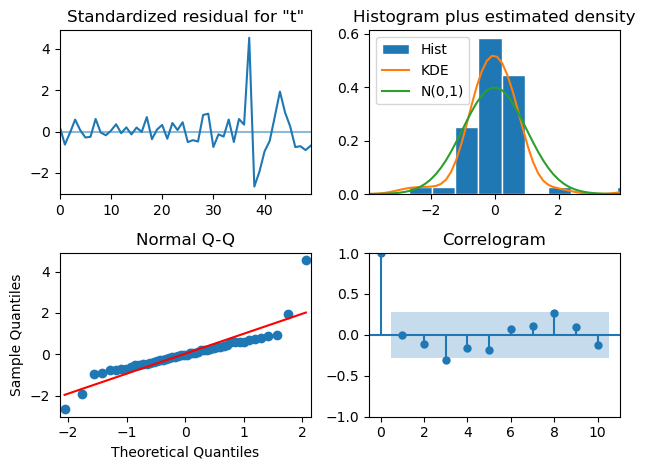

In [87]:
import pandas as pd
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Prepare endogenous and exogenous variables
endog = merged_df_aqi['total_impact_scaled']
exog = merged_df_aqi[['average_aqi_scaled', 'GIS_Acres', 'Shape_Length', 'Shape_Area', 'Circleness_Scale',
                     'peak_daily_impact', 'num_fires', 'total_acres']]

# Split data into train and test sets
train_mask = merged_df_aqi['Fire_Year'] < 2015
test_mask = merged_df_aqi['Fire_Year'] >= 2015

train_endog = endog[train_mask]
train_exog = exog[train_mask]
test_endog = endog[test_mask]
test_exog = exog[test_mask]

# Try different ARIMAX orders
orders = [(1,1,1), (2,1,2), (1,1,2)]
results = {}

for order in orders:
   try:
       model = SARIMAX(train_endog, exog=train_exog, order=order).fit()
       pred = model.predict(start=len(train_endog), 
                          end=len(train_endog) + len(test_endog) - 1,
                          exog=test_exog)
       mse = mean_squared_error(test_endog, pred)
       results[order] = mse
   except Exception as e:
       print(f"Error fitting model with order {order}: {e}")

print("\nMSE for different orders:", results)

# Use the best performing order for final model
best_order = min(results.items(), key=lambda x: x[1])[0]
print(f"\nBest performing order: {best_order}")

# ARIMAX Model with best order
arimax_model = SARIMAX(
   train_endog,
   exog=train_exog,
   order=best_order
)

try:
   arimax_result = arimax_model.fit()
   
   # Make predictions on test set
   arimax_pred = arimax_result.predict(
       start=len(train_endog),
       end=len(train_endog) + len(test_endog) - 1,
       exog=test_exog
   )
   
   # Calculate MSE
   arimax_mse = mean_squared_error(test_endog, arimax_pred)
   
   # Create future exogenous variables
   future_years = pd.DataFrame(index=range(2020, 2051))
   for col in exog.columns:
       z = np.polyfit(merged_df_aqi['Fire_Year'], exog[col], 1)
       p = np.poly1d(z)
       future_years[col] = p(future_years.index)
   
   # Forecast for 2020-2050 with ARIMAX
   forecast_model = SARIMAX(
       endog,
       exog=exog,
       order=best_order
   ).fit()
   
   # Get forecast and confidence intervals
   forecast = forecast_model.get_forecast(
       steps=len(future_years),
       exog=future_years
   )
   forecast_mean = forecast.predicted_mean
   forecast_conf_int = forecast.conf_int(alpha=0.05)
   
   # Plotting
   plt.figure(figsize=(12, 6))
   
   # Plot historical data
   plt.plot(merged_df_aqi['Fire_Year'], endog, label='Historical Data', color='blue')
   
   # Plot forecast
   plt.plot(future_years.index, forecast_mean, label='Forecast Mean', color='red')
   
   # Plot confidence intervals
   plt.fill_between(
       future_years.index,
       forecast_conf_int.iloc[:, 0],
       forecast_conf_int.iloc[:, 1],
       color='pink',
       alpha=0.3,
       label='95% Confidence Interval'
   )
   
   plt.title("ARIMAX Forecast of total_impact_scaled (2020-2050) with Uncertainty Bounds")
   plt.xlabel("Year")
   plt.ylabel("total_impact_scaled")
   plt.legend()
   plt.grid(True)
   plt.show()
   
   # Print model summary and MSE
   print(f"\nTest Set MSE: {arimax_mse}")
   print("\nModel Summary:")
   print(arimax_result.summary())
   
   # Plot model diagnostics
   arimax_result.plot_diagnostics()
   plt.tight_layout()
   plt.show()

except Exception as e:
   print(f"Error in model fitting or forecasting: {e}")

In [29]:
# Generate forecast with ARIMA or ARIMAX
forecast_values = []
lower_bounds = []
upper_bounds = []

for _ in range(n_bootstrap):
    if best_model[1] == 'ARIMA':
        forecast_result = ARIMA(df['total_impact_scaled'], order=(2, 1, 2)).fit()
        forecast = forecast_result.get_forecast(steps=n_forecasts)
    else:
        future_exog = np.random.normal(size=n_forecasts)  # Placeholder exog data for forecasting
        forecast_result = SARIMAX(df['total_impact_scaled'], exog=df[['exog']], order=(1, 1, 1)).fit(disp=False)
        forecast = forecast_result.get_forecast(steps=n_forecasts, exog=future_exog)
        
    forecast_values.append(forecast.predicted_mean)

forecast_mean = np.mean(forecast_values, axis=0)
forecast_std = np.std(forecast_values, axis=0)
lower_bound = forecast_mean - 1.96 * forecast_std
upper_bound = forecast_mean + 1.96 * forecast_std

C:\Users\navya\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\navya\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\navya\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\navya\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\navya\anaconda3\Lib\site-packages\statsmodels\tsa\state

C:\Users\navya\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\navya\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\navya\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\navya\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\navya\anaconda3\Lib\site-packages\statsmodels\tsa\state

C:\Users\navya\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\navya\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\navya\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\navya\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\navya\anaconda3\Lib\site-packages\statsmodels\tsa\state

C:\Users\navya\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\navya\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\navya\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\navya\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\navya\anaconda3\Lib\site-packages\statsmodels\tsa\state

C:\Users\navya\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\navya\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\navya\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\navya\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\navya\anaconda3\Lib\site-packages\statsmodels\tsa\state

C:\Users\navya\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\navya\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\navya\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\navya\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\navya\anaconda3\Lib\site-packages\statsmodels\tsa\state

C:\Users\navya\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\navya\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\navya\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\navya\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\navya\anaconda3\Lib\site-packages\statsmodels\tsa\state

C:\Users\navya\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\navya\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\navya\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\navya\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\navya\anaconda3\Lib\site-packages\statsmodels\tsa\state

C:\Users\navya\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\navya\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\navya\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\navya\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\navya\anaconda3\Lib\site-packages\statsmodels\tsa\state

C:\Users\navya\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\navya\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\navya\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\navya\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\navya\anaconda3\Lib\site-packages\statsmodels\tsa\state

C:\Users\navya\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\navya\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\navya\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\navya\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\navya\anaconda3\Lib\site-packages\statsmodels\tsa\state

C:\Users\navya\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\navya\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\navya\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\navya\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\navya\anaconda3\Lib\site-packages\statsmodels\tsa\state

C:\Users\navya\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\navya\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\navya\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\navya\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\navya\anaconda3\Lib\site-packages\statsmodels\tsa\state

C:\Users\navya\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\navya\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\navya\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\navya\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\navya\anaconda3\Lib\site-packages\statsmodels\tsa\state

C:\Users\navya\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\navya\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\navya\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\navya\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\navya\anaconda3\Lib\site-packages\statsmodels\tsa\state

C:\Users\navya\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\navya\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\navya\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\navya\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\navya\anaconda3\Lib\site-packages\statsmodels\tsa\state

C:\Users\navya\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\navya\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\navya\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\navya\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\navya\anaconda3\Lib\site-packages\statsmodels\tsa\state

C:\Users\navya\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\navya\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\navya\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\navya\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\navya\anaconda3\Lib\site-packages\statsmodels\tsa\state

C:\Users\navya\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\navya\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\navya\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\navya\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\navya\anaconda3\Lib\site-packages\statsmodels\tsa\state

C:\Users\navya\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\navya\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\navya\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\navya\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\navya\anaconda3\Lib\site-packages\statsmodels\tsa\state

C:\Users\navya\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\navya\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\navya\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\navya\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\navya\anaconda3\Lib\site-packages\statsmodels\tsa\state

C:\Users\navya\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\navya\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\navya\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\navya\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\navya\anaconda3\Lib\site-packages\statsmodels\tsa\state

C:\Users\navya\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\navya\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\navya\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\navya\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\navya\anaconda3\Lib\site-packages\statsmodels\tsa\state

C:\Users\navya\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\navya\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\navya\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\navya\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\navya\anaconda3\Lib\site-packages\statsmodels\tsa\state

C:\Users\navya\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\navya\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\navya\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\navya\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\navya\anaconda3\Lib\site-packages\statsmodels\tsa\state

C:\Users\navya\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\navya\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\navya\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\navya\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\navya\anaconda3\Lib\site-packages\statsmodels\tsa\state

C:\Users\navya\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\navya\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\navya\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\navya\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\navya\anaconda3\Lib\site-packages\statsmodels\tsa\state

C:\Users\navya\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\navya\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\navya\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\navya\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\navya\anaconda3\Lib\site-packages\statsmodels\tsa\state

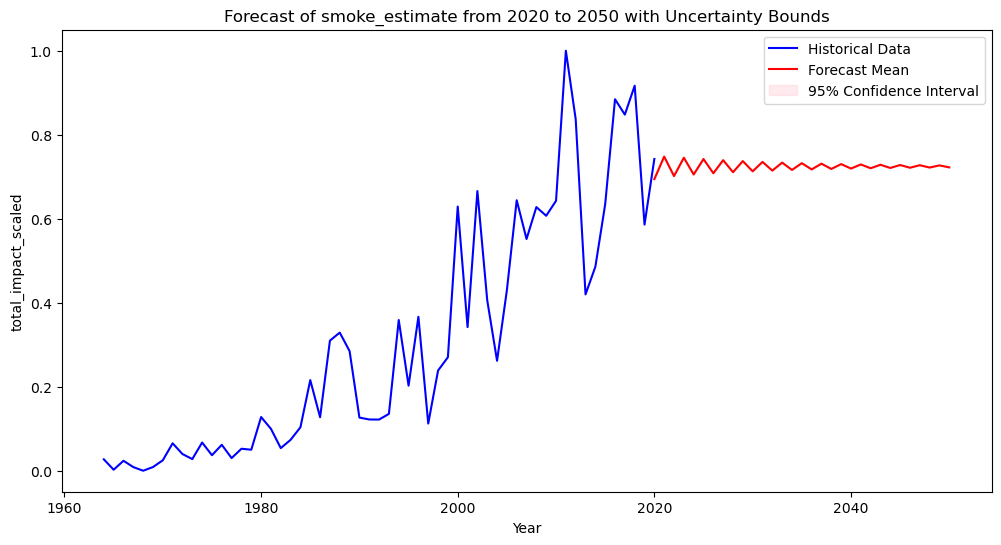

In [30]:
# Plotting historical data and forecast with uncertainty bounds
plt.figure(figsize=(12, 6))
plt.plot(df['Year'], df['total_impact_scaled'], label='Historical Data', color='blue')
plt.plot(forecast_years, forecast_mean, label='Forecast Mean', color='red')
plt.fill_between(forecast_years, lower_bound, upper_bound, color='pink', alpha=0.3, label='95% Confidence Interval')
plt.title("Forecast of smoke_estimate from 2020 to 2050 with Uncertainty Bounds")
plt.xlabel("Year")
plt.ylabel("total_impact_scaled")
plt.legend()
plt.show()

In [ ]:
# Display forecast values with uncertainty bounds
forecast_results = pd.DataFrame({
    'Year': forecast_years,
    'Forecast_Mean': forecast_mean,
    'Lower_Bound': lower_bound,
    'Upper_Bound': upper_bound
})
print(forecast_results)

In [ ]:
# Model evaluation and conclusion
print("Model Evaluation:")
print(f"ARIMA MSE: {arima_mse}")
print(f"ARIMAX MSE: {arimax_mse}")
print(f"Best model is {best_model[1]} with lowest MSE.")

In [ ]:
# Interpretation
print("\nThe forecast for smoke_estimate shows a trend with a 95% confidence interval from 2020 to 2050. The model captures seasonality and trend variations; however, uncertainties grow further into the forecast period, which is typical for long-term projections.")

In [59]:
# import pandas as pd
# import matplotlib.pyplot as plt
# import seaborn as sns

# def analyze_smoke_impacts(df):
#     """
#     Analyze smoke impacts from fire data stored in a CSV file.
    
#     Parameters:
#     csv_file_path: Path to CSV file containing fire data
#     """
#     # Read the data
# #     df = pd.read_csv(csv_file_path)
    
#     # Clean and prepare the data
#     df = df.copy()
    
#     # Ensure required columns exist and handle missing values
#     required_columns = ['OBJECTID', 'Fire_Year', 'GIS_Acres', 'Min_Distance_Miles']
#     for col in required_columns:
#         if col not in df.columns:
#             raise ValueError(f"Required column {col} not found in dataset")
    
#     # Fill missing values with reasonable defaults
#     df['GIS_Acres'] = df['GIS_Acres'].fillna(0)
#     df['Min_Distance_Miles'] = df['Min_Distance_Miles'].fillna(float('inf'))
#     if 'Circleness_Scale' in df.columns:
#         df['Circleness_Scale'] = df['Circleness_Scale'].fillna(0.5)
    
# #     # Example city population data (you can modify this)
# #     population_data = {
# #         'City_Name': 1000000  # Example: city with 1 million people
# #     }
    
#     # Calculate smoke impacts
#     impacts = calculate_smoke_impact(
#         fire_data=df,
#         distance_threshold=1000,
# #         population_exposure=population_data['City_Name']
#     )
    
#     # Convert impacts dictionary to DataFrame for analysis
#     impact_df = pd.DataFrame.from_dict(impacts, orient='index')
    
#     # Create visualizations
#     plt.figure(figsize=(15, 10))
    
#     # Plot 1: Total Impact by Year
#     plt.subplot(2, 2, 1)
#     impact_df['total_impact'].plot(kind='bar')
#     plt.title('Total Smoke Impact by Year')
#     plt.xlabel('Year')
#     plt.ylabel('Impact Score')
#     plt.xticks(rotation=45)
    
#     # Plot 2: Average Impact per Fire
#     plt.subplot(2, 2, 2)
#     impact_df['average_impact_per_fire'].plot(kind='bar')
#     plt.title('Average Impact per Fire by Year')
#     plt.xlabel('Year')
#     plt.ylabel('Impact Score')
#     plt.xticks(rotation=45)
    
#     # Plot 3: Number of Fires
#     plt.subplot(2, 2, 3)
#     impact_df['num_fires'].plot(kind='bar')
#     plt.title('Number of Fires by Year')
#     plt.xlabel('Year')
#     plt.ylabel('Count')
#     plt.xticks(rotation=45)
    
#     # Plot 4: Total Acres Burned
#     plt.subplot(2, 2, 4)
#     impact_df['total_acres'].plot(kind='bar')
#     plt.title('Total Acres Burned by Year')
#     plt.xlabel('Year')
#     plt.ylabel('Acres')
#     plt.xticks(rotation=45)
    
#     plt.tight_layout()
    
#     return impact_df, plt.gcf()

# # Example usage:
# if __name__ == "__main__":
# #     # Example of how to use the function
# #     file_path = "your_fire_data.csv"  # Replace with your actual file path
    
#     try:
#         # Analyze the data
#         impact_results, fig = analyze_smoke_impacts(wildfire_df_within_650_miles)
        
#         # Display results
#         print("\nSmoke Impact Analysis Results:")
#         print("\nSummary Statistics:")
#         print(impact_results.describe())
        
#         # Display worst smoke impact years
#         print("\nTop 5 Years by Total Smoke Impact:")
#         print(impact_results.sort_values('total_impact', ascending=False).head())
        
#         # Save visualization
#         fig.savefig('smoke_impact_analysis.png')
#         plt.close()
        
#         # Export results to CSV
#         impact_results.to_csv('smoke_impact_results.csv')
        
#     except Exception as e:
#         print(f"Error analyzing smoke impacts: {str(e)}")


Smoke Impact Analysis Results:

Summary Statistics:
       total_impact  peak_daily_impact    num_fires   total_acres  \
count     57.000000          57.000000    57.000000  5.700000e+01   
mean     141.423294           0.051910   623.543860  1.601306e+06   
std      128.919645           0.038326   523.372616  1.788465e+06   
min        6.885126           0.003922    85.000000  3.159422e+04   
25%       31.963244           0.019039   213.000000  2.640788e+05   
50%       95.449558           0.044101   460.000000  8.770305e+05   
75%      241.738642           0.085179  1052.000000  2.281594e+06   
max      455.370321           0.147945  2185.000000  7.632384e+06   

       average_impact_per_fire  impact_density  
count                57.000000       57.000000  
mean                  0.201558        0.000134  
std                   0.065668        0.000110  
min                   0.078445        0.000047  
25%                   0.160432        0.000073  
50%                   0.206666 

      total_impact  peak_daily_impact  num_fires   total_acres  \
1964     17.920235           0.009815        138  1.133548e+05   
1965      7.844458           0.003922        100  4.558144e+04   
1966     16.514620           0.009314        170  3.532805e+05   
1967     10.403798           0.007076         98  3.159422e+04   
1968      6.885126           0.005187         85  4.076966e+04   
1969     10.425039           0.009234         98  7.392877e+04   
1970     16.981633           0.004180        176  9.387347e+04   
1971     33.404820           0.023607        214  4.669982e+05   
1972     23.027348           0.006822        146  2.349236e+05   
1973     18.142432           0.005212        156  2.181778e+05   
1974     34.171930           0.019039        213  2.202437e+05   
1975     23.846444           0.044101        144  1.202346e+05   
1976     31.963244           0.013787        189  2.640788e+05   
1977     19.123931           0.014366        128  6.641138e+04   
1978     3

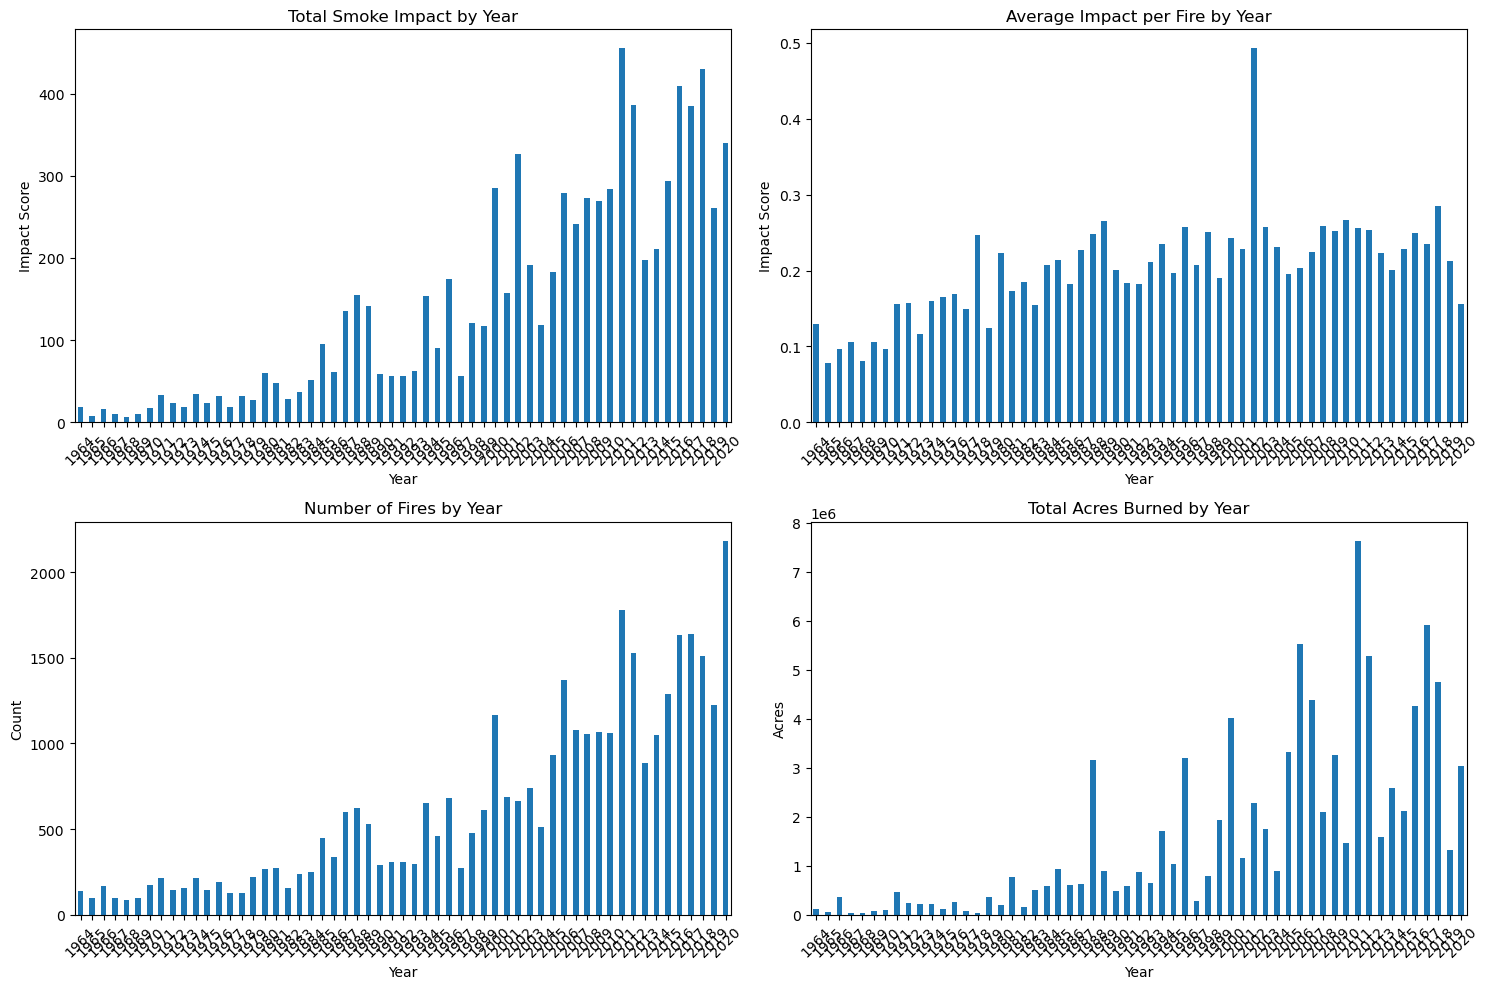

In [60]:
# # Replace with your actual file path
# # file_path = "your_fire_data.csv"
# impact_results, fig = analyze_smoke_impacts(wildfire_df_within_650_miles)

# # View the results
# print(impact_results)

# # Display the plots
# plt.show()

In [61]:
# impact_results

,total_impact,peak_daily_impact,num_fires,total_acres,average_impact_per_fire,impact_density
1964,17.920235,0.009815,138,1.133548e+05,0.129857,0.000158
1965,7.844458,0.003922,100,4.558144e+04,0.078445,0.000172
1966,16.514620,0.009314,170,3.532805e+05,0.097145,0.000047
1967,10.403798,0.007076,98,3.159422e+04,0.106161,0.000329
1968,6.885126,0.005187,85,4.076966e+04,0.081001,0.000169
1969,10.425039,0.009234,98,7.392877e+04,0.106378,0.000141
1970,16.981633,0.004180,176,9.387347e+04,0.096487,0.000181
1971,33.404820,0.023607,214,4.669982e+05,0.156097,0.000072
1972,23.027348,0.006822,146,2.349236e+05,0.157722,0.000098
1973,18.142432,0.005212,156,2.181778e+05,0.116298,0.000083
